# SOM applied to RGB data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The dataset consists of $N=3000$ points of type RGB, i.e., three number tuples in the range $[0,255]$ each.

The funcion `imshow` from the package `pyplot` can represent each point as a colour pixel. 

For example:

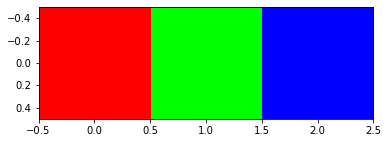

In [2]:
a = (255,0,0)
b = (0,255,0)
c = (0,0,255)
plt.imshow(np.array([a,b,c]).reshape(1,3,3))

Generation of the dataset

In [3]:
N = 3000
train_data = np.random.randint(0, 255, (N, 3))
train_data.shape,train_data[0]


((3000, 3), array([194, 147,  65]))

## Plot of dataset

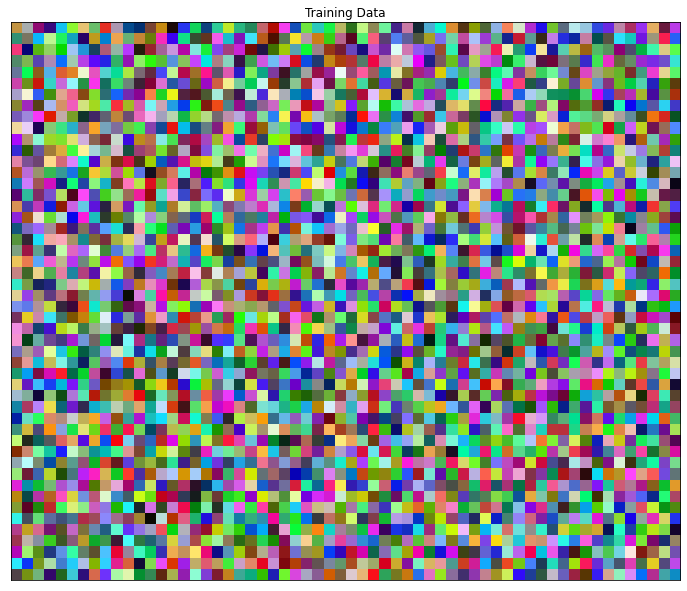

In [4]:
fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(12, 12), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax.imshow(train_data.reshape(50, 60, 3))
ax.title.set_text('Training Data')

First ten data points

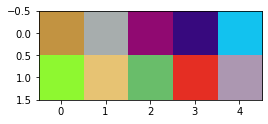

In [5]:
f,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
ax.imshow(train_data[0:10].reshape(2,5,3))

## Self Organizing Map

We use a SOM to cluster the dataset. The SOM will have $5\times 5=25$ cells. Each cell will be a 3 dimensional tuple. Cells will start with random numbers uniformly distributed in the interval $[0,255]$.

We will use a _rectangular_ vicinity scheme: each cell will have four neighbours.

In [6]:
# Dimensions
nrows = 10
ncols = 10
dimensions = 3

In [7]:
from som.som import som
smm = som(nrows=nrows,ncols=ncols,dimension=dimensions,vmax=255)

In [8]:
smm.SOM[0,0]

array([139.9474435 , 182.37328842, 153.7046609 ])

The figure shows two random initializations of the untrained SOM.

[]

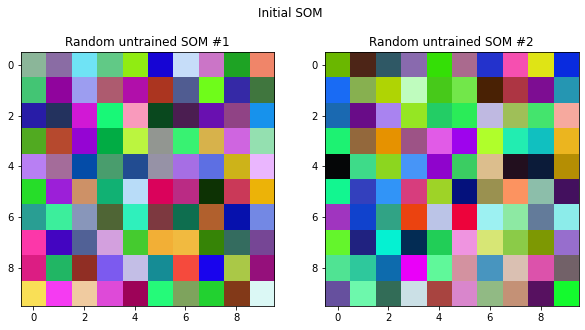

In [9]:
f,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax[0].imshow(smm.SOM.astype('int'))
ax[0].set_title('Random untrained SOM #1')
smm2 = som(nrows=nrows,ncols=ncols,dimension=dimensions,vmax=255,randomState=1)
ax[1].imshow(smm2.SOM.astype('int'))
ax[1].set_title('Random untrained SOM #2')
f.suptitle('Initial SOM')
plt.plot()

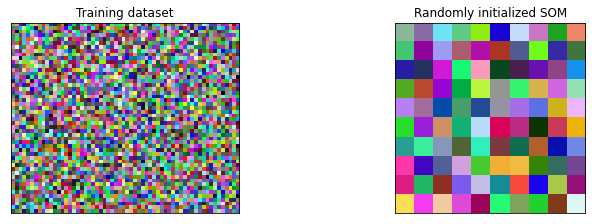

In [10]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training dataset')
ax[1].imshow(smm.SOM.astype(int))
ax[1].title.set_text('Randomly initialized SOM')


## Train som

We _feed_ the training data into the randomly initialized SOM

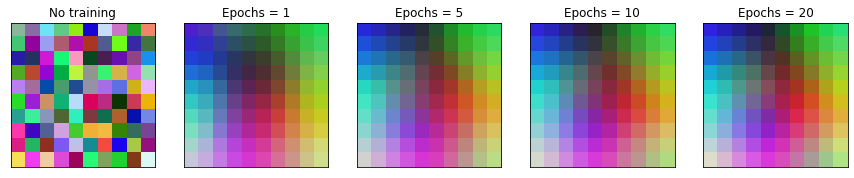

In [11]:
fig, ax = plt.subplots(
    nrows=1, ncols=5, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[])
)
ax[0].imshow(smm.SOM.astype(int))
ax[0].title.set_text('No training')
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(1,5)):
    total_epochs += epochs
    smm.train_SOM(train_data=train_data, epochs=epochs)
    SOM = smm.SOM
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

## Effect of SOM size

We try using different numbers of neurons in the SOM.



In [12]:
smmSmall = som(nrows=3,ncols=3,dimension=dimensions,vmax=255)
smmMedium = som(nrows=5,ncols=5,dimension=dimensions,vmax=255)
smmBig = som(nrows=10,ncols=10,dimension=dimensions,vmax=255)
smmVeryBig = som(nrows=20,ncols=20,dimension=dimensions,vmax=255)

In [13]:
smmSmall.train_SOM(train_data=train_data, epochs=5)
smmMedium.train_SOM(train_data=train_data, epochs=5)
smmBig.train_SOM(train_data=train_data, epochs=5)
smmVeryBig.train_SOM(train_data=train_data, epochs=5)

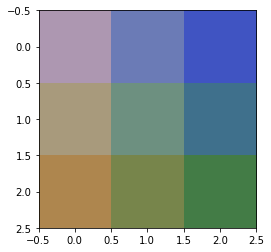

In [14]:
plt.imshow(smmSmall.SOM.astype(int))

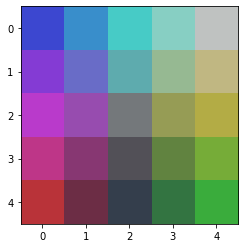

In [15]:
plt.imshow(smmMedium.SOM.astype(int))

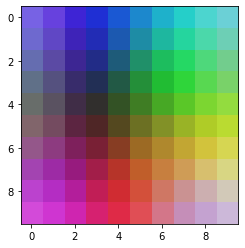

In [16]:
plt.imshow(smmBig.SOM.astype(int))

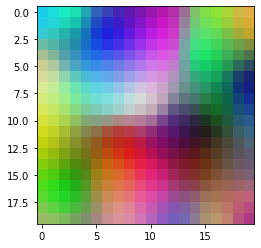

In [17]:
plt.imshow(smmVeryBig.SOM.astype(int))

## Effect of learning parameters

We test the effect of the learning parameters. We choose a SOM size of $10 \times 10$ and training `epochs` equal to 5.

The learning rate, $lr(t)$ formula is:

$$
lr(t)=lr_0*e^{-t\cdot lr_{decay}}
$$

where:
* $lr_0$ is the initial learning decay (default value 0.1)
* $t$ is the `epoch`
* $lr_{decay}$ is the decay factor (default value 0.1)

The kernel radius, $rd(t)$, formula is:

$$
rd(t)=rd_0*e^{-t\cdot rd_{decay}}
$$

where:
* $rd_0$ is the initial radius of the kernel (default value 1)
* $t$ is the `epoch`
* $rd_{decay}$ is the decay factor (default value 0.1)

We test the effect on the final trained SOM of the parameters $rd_0$ and $lr_0$. We make a grid using the following values for the parameters:
* $lr_0 \in [0.001,0.5,0.99]$
* $rd_0 \in [0.01,1,10]$


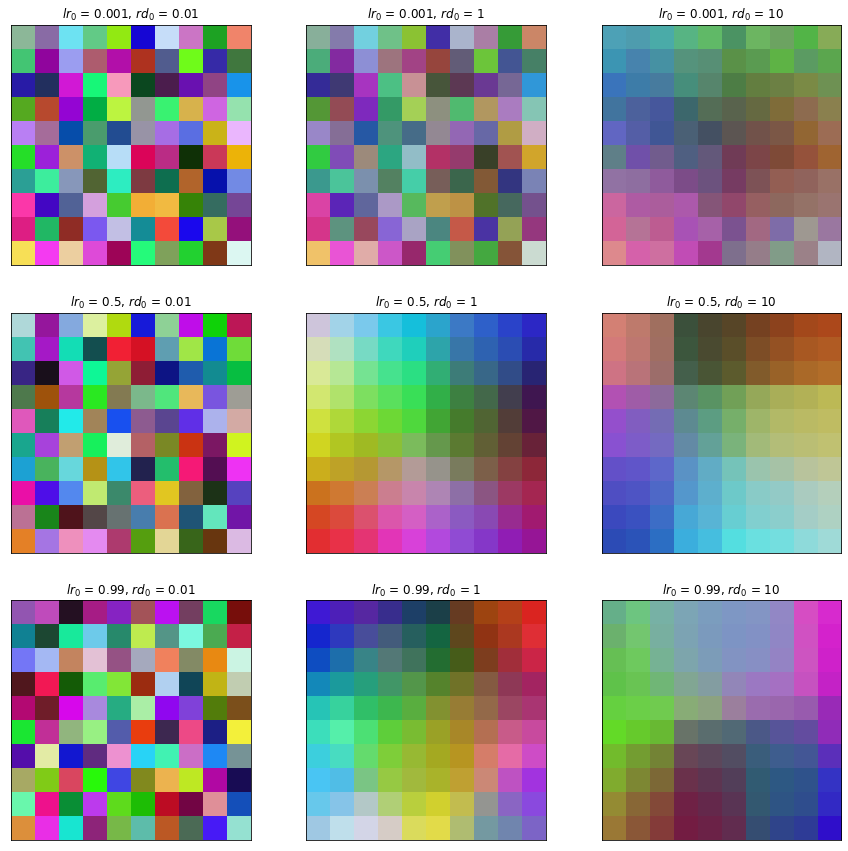

In [18]:
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15), 
    subplot_kw=dict(xticks=[], yticks=[]))

for learn_rate, i in zip([0.001, 0.5, 0.99], [0, 1, 2]):
    for radius_sq, j in zip([0.01, 1, 10], [0, 1, 2]):
        smm = som(nrows=10,
                  ncols=10,
                  dimension=dimensions,
                  vmax=255,
                  learn_rate=learn_rate,
                  radius_sq=radius_sq)
        smm.train_SOM(train_data=train_data, epochs = 5)
        ax[i][j].imshow(smm.SOM.astype(int))
        ax[i][j].title.set_text('$lr_0$ = ' + str(learn_rate) + 
                                ', $rd_0$ = ' + str(radius_sq))

## Distribution of data in SOM

The training data we have used so far consists of $N=3000$ points (colors) whose three channels (R-G-B) are evenly distributed in the interval $[0,255]$. We can plot the histogram of each channel for the training data:

[]

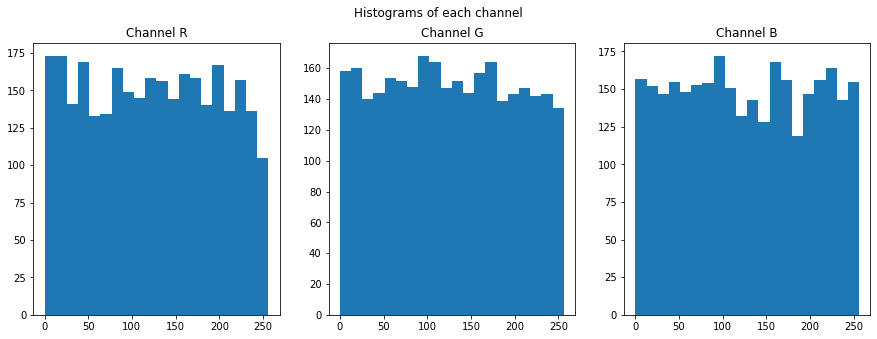

In [19]:
f,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
bins = 20
ax[0].hist(train_data[:][:,0],bins=bins,range=(0,256))
ax[0].set_title('Channel R')
ax[1].hist(train_data[:][:,1],bins=bins,range=(0,256))
ax[1].set_title('Channel G')
ax[2].hist(train_data[:][:,2],bins=bins,range=(0,256))
ax[2].set_title('Channel B')
f.suptitle('Histograms of each channel')
plt.plot()

We expect the distribution of the channels of a well trained SOM to be the same.

[]

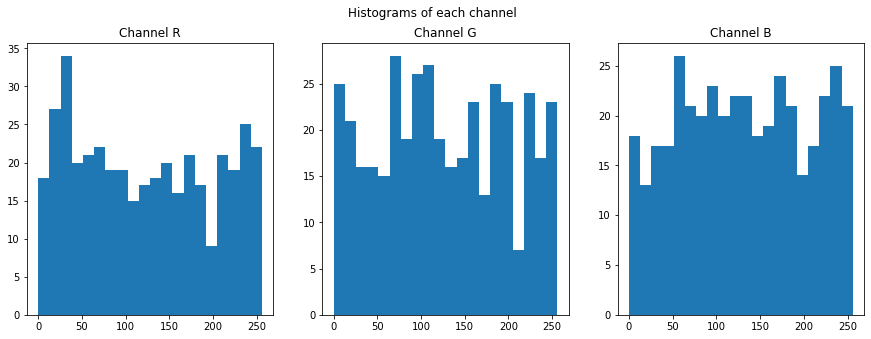

In [20]:
nrows = 20
ncols = 20
smm = som(nrows=nrows,ncols=ncols,dimension=dimensions,vmax=255)
f,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
bins = 20
ax[0].hist(smm.SOM.reshape(nrows*ncols,3)[:,0],bins=bins,range=(0,256))
ax[0].set_title('Channel R')
ax[1].hist(smm.SOM.reshape(nrows*ncols,3)[:,1],bins=bins,range=(0,256))
ax[1].set_title('Channel G')
ax[2].hist(smm.SOM.reshape(nrows*ncols,3)[:,2],bins=bins,range=(0,256))
ax[2].set_title('Channel B')
f.suptitle('Histograms of each channel')
plt.plot()

[]

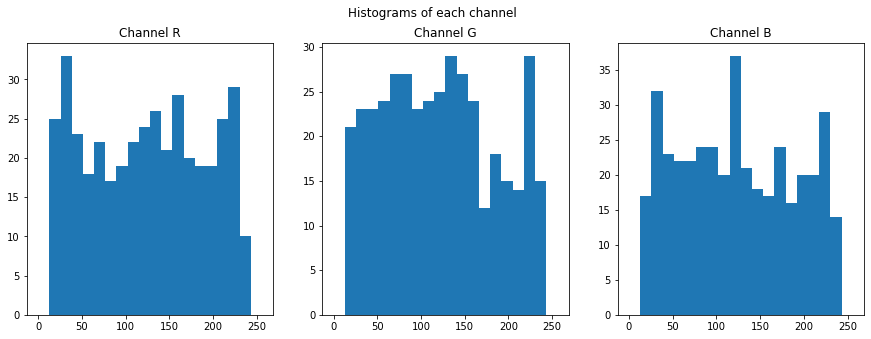

In [21]:
smm.train_SOM(train_data=train_data, epochs = 5)
f,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
bins = 20
ax[0].hist(smm.SOM.reshape(nrows*ncols,3)[:,0],bins=bins,range=(0,256))
ax[0].set_title('Channel R')
ax[1].hist(smm.SOM.reshape(nrows*ncols,3)[:,1],bins=bins,range=(0,256))
ax[1].set_title('Channel G')
ax[2].hist(smm.SOM.reshape(nrows*ncols,3)[:,2],bins=bins,range=(0,256))
ax[2].set_title('Channel B')
f.suptitle('Histograms of each channel')
plt.plot()

### Biased training data

We can create _biased_ initial data, e.g., color points that mostly belong to the red-like spectrum.

In [22]:
n_x = 3000
rand = np.random.RandomState(0)

train_data_R = rand.randint(175, 255, (n_x, 1))
train_data_G = rand.randint(0, 200, (n_x, 1))
train_data_B = rand.randint(0, 150, (n_x, 1))
train_data_RED = np.zeros((n_x,3)).astype('int')
train_data_RED[:,0] = train_data_R.reshape(n_x,)
train_data_RED[:,1] = train_data_G.reshape(n_x,)
train_data_RED[:,2] = train_data_B.reshape(n_x,)


In [23]:
nrows = 20
ncols = 20
smmRED = som(nrows=nrows,ncols=ncols,dimension=dimensions,vmax=255)
SOM_untrained = smmRED.SOM.copy()
smmRED.train_SOM(train_data= train_data_RED,epochs=5)

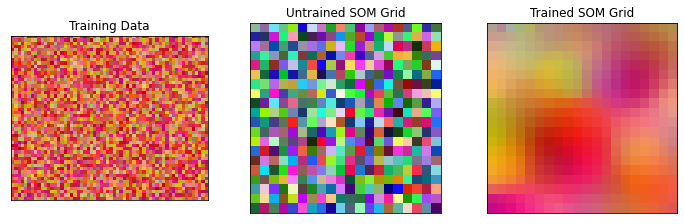

In [24]:
fig, ax = plt.subplots(
    nrows=1, ncols=3, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data_RED.reshape(50, 60, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(SOM_untrained.astype(int))
ax[1].title.set_text('Untrained SOM Grid')
ax[2].imshow(smmRED.SOM.astype(int))
ax[2].title.set_text('Trained SOM Grid')

Text(0.5, 1.0, 'SOM Canal B')

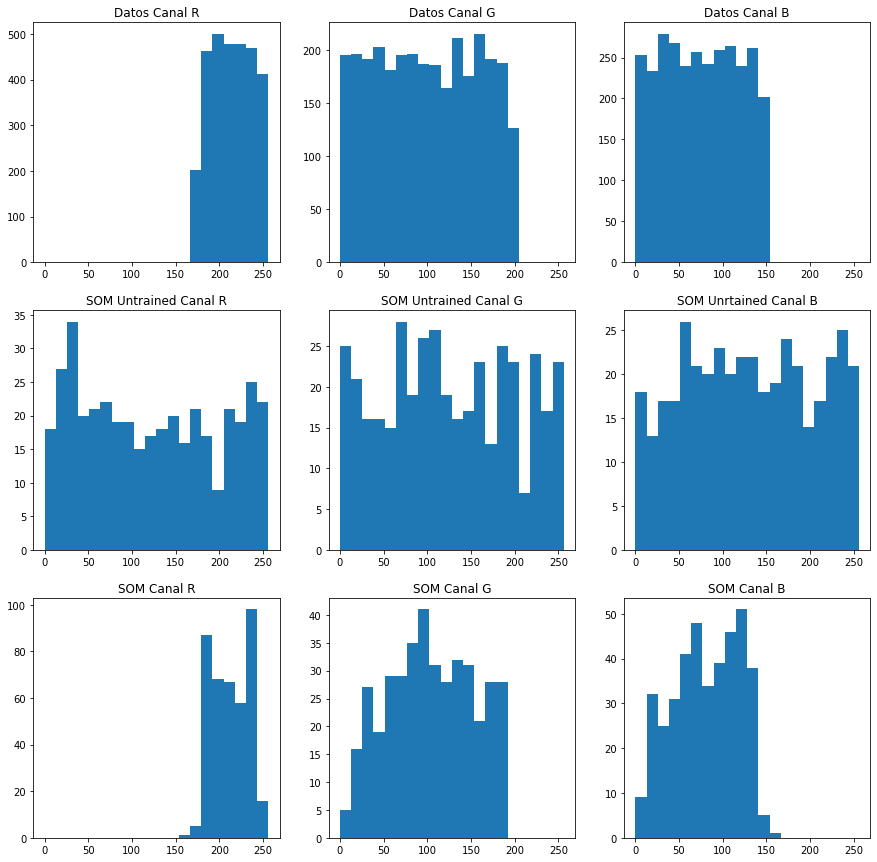

In [25]:
bins = 20

f,ax=plt.subplots(nrows=3,ncols=3,figsize=(15,15))

ax[0,0].hist(train_data_RED[:,0],bins=bins,range=(0,256))
ax[0,0].set_title('Datos Canal R')
ax[0,1].hist(train_data_RED[:,1],bins=bins,range=(0,256))
ax[0,1].set_title('Datos Canal G')
ax[0,2].hist(train_data_RED[:,2],bins=bins,range=(0,256))
ax[0,2].set_title('Datos Canal B')

ax[1,0].hist(SOM_untrained.reshape(nrows*ncols,3)[:,0],bins=bins,range=(0,256))
ax[1,0].set_title('SOM Untrained Canal R')
ax[1,1].hist(SOM_untrained.reshape(nrows*ncols,3)[:,1],bins=bins,range=(0,256))
ax[1,1].set_title('SOM Untrained Canal G')
ax[1,2].hist(SOM_untrained.reshape(nrows*ncols,3)[:,2],bins=bins,range=(0,256))
ax[1,2].set_title('SOM Unrtained Canal B')

ax[2,0].hist(smmRED.SOM.reshape(nrows*ncols,3)[:,0],bins=bins,range=(0,256))
ax[2,0].set_title('SOM Canal R')
ax[2,1].hist(smmRED.SOM.reshape(nrows*ncols,3)[:,1],bins=bins,range=(0,256))
ax[2,1].set_title('SOM Canal G')
ax[2,2].hist(smmRED.SOM.reshape(nrows*ncols,3)[:,2],bins=bins,range=(0,256))
ax[2,2].set_title('SOM Canal B')
